In [1]:
%reset
%matplotlib inline
import networkx as nx
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import cmath as c

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


**Gaussian Network Model**

Describes network interactions in complex phase,amplitude, freq state space. Interactions are modulated by elastic interactions between nodes.

In [2]:
class NetworkModel:
    def __init__(self, G, dt = .05):
        self.G = G #Graph representation of network
        self.states = np.matrix([1,1,1,1,1,1]).T
        self.t = 0 #time
        self.dt = dt #time step
    
    #Kuramoto differential equation
    def phase_dev(self,phase):
        pass
    
    #euler method approximation of behavior
    def euler_step(self):
        new_state = self.states[:,-1] + self.phase_dev(self.states[:,-1])*self.dt
        new_state = new_state % (2 * np.pi)
        self.t += self.dt
        self.states = np.hstack((self.states,new_state))
       
    #runge-Kutta approximation of behavior
    def runge_kutta_step(self):
        k1 = self.phase_dev(self.states[:,-1])*self.dt
        k2 = self.phase_dev(self.states[:,-1]+ .5*k1)*self.dt
        k3 = self.phase_dev(self.states[:,-1]+ .5*k2)*self.dt
        k4 = self.phase_dev(self.states[:,-1]+ k3)*self.dt
        new_state = self.states[:,-1] + (k1+ 2*k2 + 2*k3 + k4)/6
        new_state = new_state % (2 * np.pi)
        self.t += self.dt
        self.states = np.hstack((self.states,new_state))
    
    #time step function
    def step(self):
        self.euler_step()

/usr/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


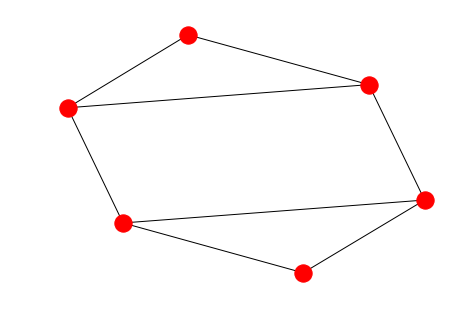

In [3]:
nodes = [1,2,3,4,5,6]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from([(1,2,{'w':[1,2,3]}),(2,3,{'w':[1,2,3]}),(1,6,{'w':[1,2,3]}),(1,3,{'w':[1,2,3]}),(3,4,{'w':[1,2,3]}),
                  (4,5,{'w':[1,2,3]}),(4,6,{'w':[1,2,3]}),(5,6,{'w':[1,2,3]})])


#Quick plot of G
nx.draw(G)